## <h1><center> Multiple Linear Regression Assignment</center></h1>

### Table of Conents <a ID=0.1></a>

1. [Problem Statement](#1)
2. [Reading and Understanding Data](#2)
3. [Visualizing Data](#3)
4. [Creating Dummy variables](#4)
5. [Splitting the Dataset into test and training data](#5)
6. [Rescaling the data](#6)
7. [Creating X and y variables](#7)
8. [Bulidling Model](#8)
9. [Residual Analysis](#9)
10. [Prediction and Evaluation on test set](#10)
11. [R2 score](#0.2)

## 1. Problem Statement: <a ID=1></a>

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The company wants —


- To understand the demand for shared bikes among the people

- Which variables are significant in predicting the demand for shared bikes

- How well those variables describe the bike demands

#### Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## 2. Reading and Understanding data<a ID=2></a>
[Table of Contents](#0.1)

In [1]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns',100)

# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
boombikes = pd.read_csv('day.csv')
boombikes.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [3]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Dropping redundant columns

In [5]:
boombikes.drop(['instant','casual','registered','dteday','atemp'],axis=1,inplace=True)

### Replacing values in season, yr, mnth,weekday, weathersit with appropriate terms

In [6]:
boombikes['season'] = boombikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

boombikes['yr'] = boombikes['yr'].map({0: '2018', 1:'2019'})

boombikes['mnth'] = boombikes['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',
                                 8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

boombikes['weekday'] = boombikes['weekday'].map({1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun'})

boombikes['weathersit'] = boombikes['weathersit'].map({1:'Clear_FewClouds',2:'Mist_Cloudy',
                                         3:'LightSnow_RainThunderstorm',
                                         4:'HeavyRain_IcePallets_Thunderstorm'})

In [7]:
boombikes.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Mon,1,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Tue,1,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Wed,1,Clear_FewClouds,8.050924,43.7273,16.636703,1349


## 3. Visualizing Data<a ID=3></a>
[Table of Contents](#0.1)

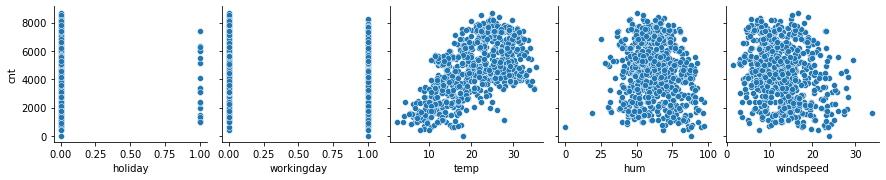

In [8]:
# Checking target variable against other independent variables

sns.pairplot(data=boombikes,
             y_vars='cnt',
             x_vars= ['holiday','workingday','temp','hum','windspeed'])
plt.show()

### `temp` seems to be the only one independant variable showing linear relationship with `cnt`

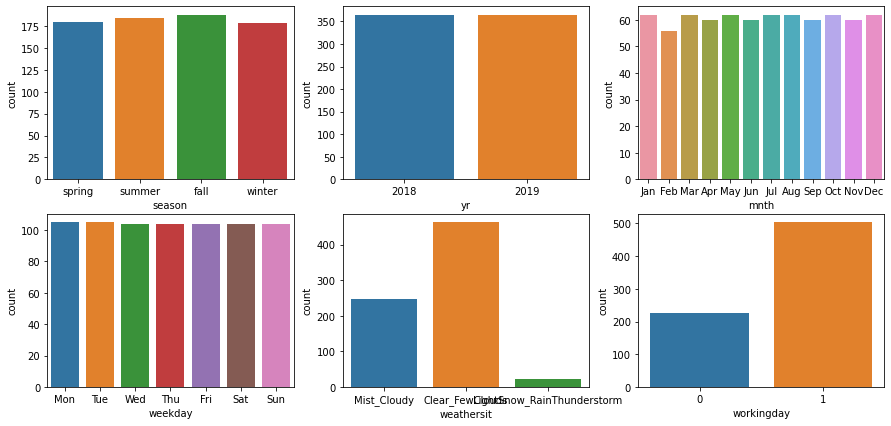

In [9]:

plt.figure(figsize=(15, 7))
plt.subplot(2,3,1)
sns.countplot(data=boombikes,x='season')
plt.subplot(2,3,2)
sns.countplot(data=boombikes,x='yr')
plt.subplot(2,3,3)
sns.countplot(data=boombikes,x='mnth')
plt.subplot(2,3,4)
sns.countplot(data=boombikes,x='weekday')
plt.subplot(2,3,5)
sns.countplot(data=boombikes,x='weathersit')
plt.subplot(2,3,6)
sns.countplot(data=boombikes,x='workingday')

plt.show()


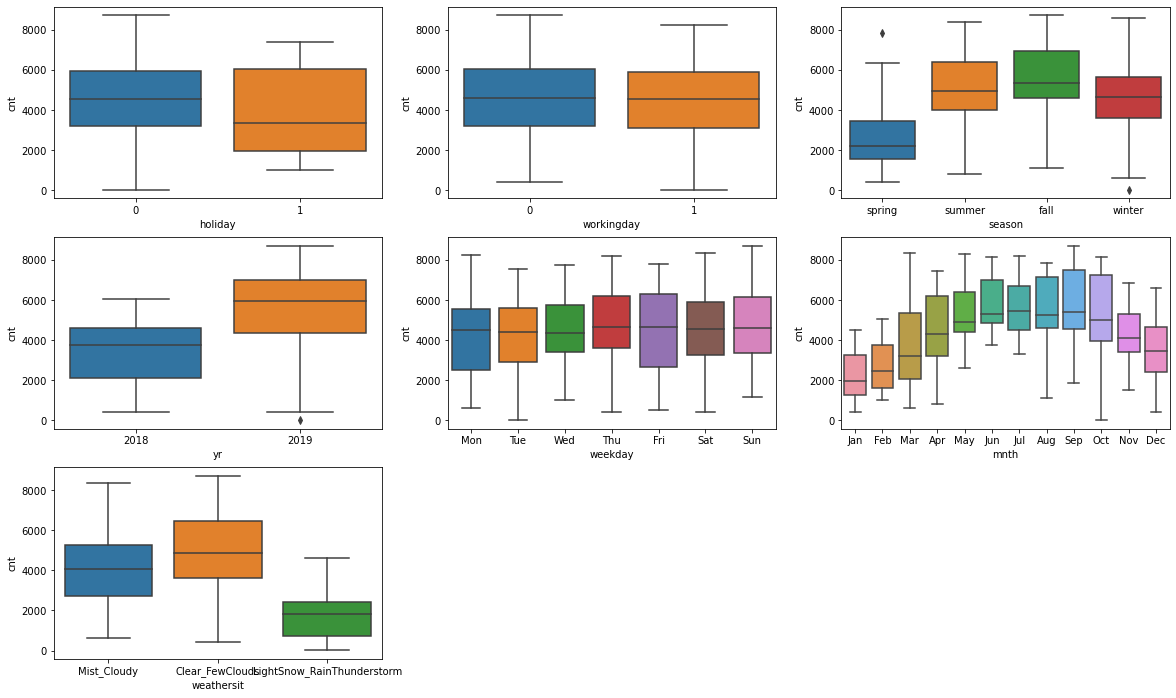

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = boombikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = boombikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'season', y = 'cnt', data = boombikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'yr', y = 'cnt', data = boombikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data =boombikes)

plt.show()

### Observations:
- There does seems to be any relatioship between `weekday` and `cnt` i.e, Almost same mediam cnt
- There does seems to be any relatioship between `workingday` and `cnt` i.e, Almost same mediam cnt
- Almost same count of `month`
- Same median value for `weekday`

In [11]:
# dropping columns

boombikes.drop(['weekday','workingday','mnth','weekday'],axis=1,inplace=True)

boombikes.head()

,season,yr,holiday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,0,Clear_FewClouds,8.050924,43.7273,16.636703,1349
3,spring,2018,0,Clear_FewClouds,8.200000,59.0435,10.739832,1562
4,spring,2018,0,Clear_FewClouds,9.305237,43.6957,12.522300,1600


## Creating Dummy Variables for Categorical columns <a ID=4></a>
[Table of Contents](#0.1)

In [12]:
season = pd.get_dummies(boombikes.season,drop_first=True)
year = pd.get_dummies(boombikes.yr,drop_first=True)
weather = pd.get_dummies(boombikes.weathersit,drop_first=True)

In [13]:
boombikes.drop(['season','yr','weathersit'],axis=1,inplace=True)

In [14]:
boombikes = pd.concat([boombikes,season,year,weather],axis=1)

boombikes.head()

,holiday,temp,hum,windspeed,cnt,spring,summer,winter,2019,LightSnow_RainThunderstorm,Mist_Cloudy
0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,1
1,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,1
2,0,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0
3,0,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0
4,0,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0


## 5. Splitting the data<a ID=5></a>
[Table of Contents](#0.1)

In [15]:
boombikes_train,boombikes_test = train_test_split(boombikes,train_size=0.7,test_size=0.3,random_state=100)

In [16]:
print(boombikes_train.shape)
print(boombikes_test.shape)

(510, 11)
(219, 11)


## 6. Rescaling data using MinMaxScaler <a ID=6></a>
[Table of Contents](#0.1)

In [17]:
scaling_vars = ['temp','hum','windspeed','cnt']

In [18]:
scaler = MinMaxScaler()

In [19]:
boombikes_train[scaling_vars] = scaler.fit_transform(boombikes_train[scaling_vars])

In [20]:
boombikes_train.head(2)

,holiday,temp,hum,windspeed,cnt,spring,summer,winter,2019,LightSnow_RainThunderstorm,Mist_Cloudy
653,0,0.509887,0.575354,0.300794,0.864243,0,0,1,1,0,0
576,0,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0


In [21]:
boombikes_test[scaling_vars] = scaler.transform(boombikes_test[scaling_vars])

In [22]:
boombikes_test.head(2)

,holiday,temp,hum,windspeed,cnt,spring,summer,winter,2019,LightSnow_RainThunderstorm,Mist_Cloudy
184,1,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,1
535,0,0.901354,0.610133,0.153728,0.712034,0,1,0,1,0,0


## Checking correlation between the train dataset columns

In [23]:
cor = boombikes_train.corr()

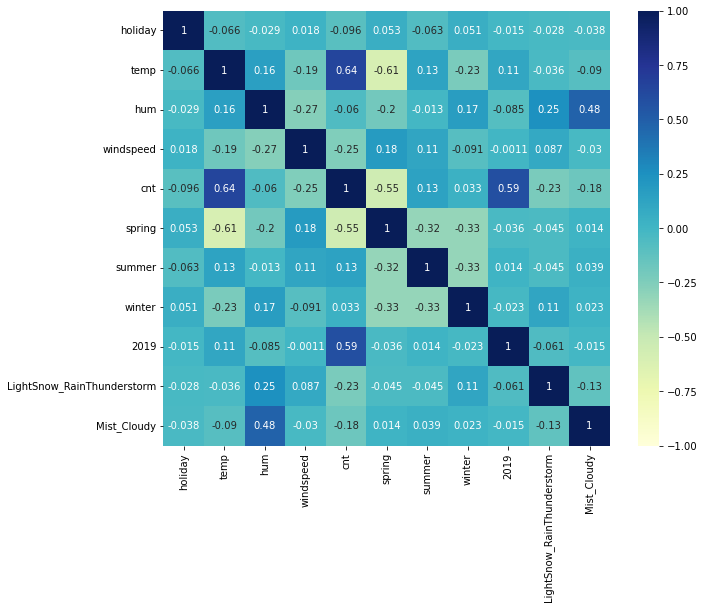

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,cmap='YlGnBu',vmax=1.0,vmin=-1.0,center=0.0,annot=True)
plt.show()

#### Observatoin: 
- `temp` and `yr` showing high positive colleration with `cnt`

## 7. Creating X and y variables <a ID=7></a>
[Table of Contents](#0.1)

In [25]:
y_train = boombikes_train.pop('cnt')
X_train = boombikes_train

In [26]:
y_test = boombikes_test.pop('cnt')
X_test = boombikes_test

In [27]:
y_train.head(2)

653    0.864243
576    0.827658
Name: cnt, dtype: float64

In [28]:
X_train.head(2)

,holiday,temp,hum,windspeed,spring,summer,winter,2019,LightSnow_RainThunderstorm,Mist_Cloudy
653,0,0.509887,0.575354,0.300794,0,0,1,1,0,0
576,0,0.815169,0.725633,0.264686,0,0,0,1,0,0


In [29]:
y_test.head(2)

184    0.692706
535    0.712034
Name: cnt, dtype: float64

In [30]:
X_test.head(2)

,holiday,temp,hum,windspeed,spring,summer,winter,2019,LightSnow_RainThunderstorm,Mist_Cloudy
184,1,0.831783,0.657364,0.084219,0,0,0,0,0,1
535,0,0.901354,0.610133,0.153728,0,1,0,1,0,0


## 8. Building  Model <a ID=8></a>
[Table of Contents](#0.1)

In [31]:
# Creating a model using statsmodels and using all the independant variables

X_train_sm = sm.add_constant(X_train)
lr_model = sm.OLS(y_train,X_train_sm).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          4.78e-183
Time:                        22:00:38   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,27.02
1,temp,14.79
3,windspeed,4.64
4,spring,3.71
6,winter,3.05
9,Mist_Cloudy,2.28
5,summer,2.24
7,2019,2.07
8,LightSnow_RainThunderstorm,1.24
0,holiday,1.04


In [34]:
#dropping columns wih high vif

X_train.drop(['hum','windspeed'],axis=1,inplace = True)

In [35]:
X_train_sm = sm.add_constant(X_train)
lr_model = sm.OLS(y_train,X_train_sm).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     267.5
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          2.11e-175
Time:                        22:00:38   Log-Likelihood:                 462.37
No. Observations:                 510   AIC:                            -906.7
Df Residuals:                     501   BIC:                            -868.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [36]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.60
5,2019,2.06
3,summer,1.52
7,Mist_Cloudy,1.52
4,winter,1.42
2,spring,1.29
6,LightSnow_RainThunderstorm,1.06
0,holiday,1.04


In [37]:
# dropping summer as it is having high p value

X_train.drop('summer',axis=1,inplace=True)

In [38]:
X_train_sm = sm.add_constant(X_train)
lr_model = sm.OLS(y_train,X_train_sm).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     303.9
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          5.74e-176
Time:                        22:00:38   Log-Likelihood:                 460.74
No. Observations:                 510   AIC:                            -905.5
Df Residuals:                     502   BIC:                            -871.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [39]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.25
4,2019,2.04
6,Mist_Cloudy,1.48
3,winter,1.29
2,spring,1.22
5,LightSnow_RainThunderstorm,1.06
0,holiday,1.04


## 9. Residual Analysis <a ID=9></a>
[Table of Contents](#0.1)

In [40]:
y_train_pred = lr_model.predict(X_train_sm)

In [41]:
residuals = y_train-y_train_pred

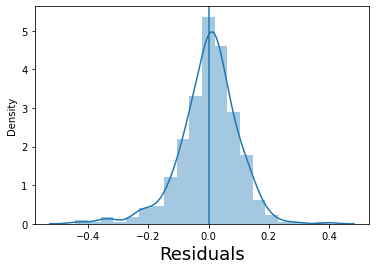

In [42]:
fig = plt.figure()
sns.distplot(residuals, bins = 20)    
plt.xlabel('Residuals', fontsize = 18)
plt.axvline(0)

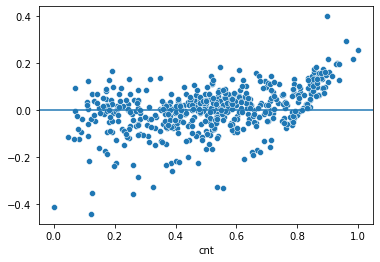

In [43]:
sns.scatterplot(x=y_train,y=residuals)
plt.axhline(0)
plt.show()

## Observation:

- Hence it is evident that the Error terms or residuals are noramlly distributed
- Error terms are showing constant variance i.e, homoscedasticity

## 10. Prediction and Evaluation on test set<a ID=10></a>
[Table of Contents](#0.1)

In [44]:
X_test.drop(['hum','windspeed','summer'],axis=1,inplace=True)

In [45]:
X_test.head(2)

,holiday,temp,spring,winter,2019,LightSnow_RainThunderstorm,Mist_Cloudy
184,1,0.831783,0,0,0,0,1
535,0,0.901354,0,0,1,0,0


In [46]:
X_test_sm = sm.add_constant(X_test)

In [47]:
y_test_pred = lr_model.predict(X_test_sm)

In [48]:
r2Score = r2_score(y_true=y_test,y_pred=y_test_pred)

## R2 score <a ID=0.2></a>
[Table of Contents](#0.1)

In [49]:
round(r2Score,2)

0.81

## <font color = red >Model best fit line:</font>

$ cnt = 0.2068 + (0.446m \times temp) + (0.2337 \times year) + (0.0557 \times winter) - (0.0911 \times holiday) - (0.119 \times spring) - (0.2958 \times weathersit) $  